<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP2/parte_2_colormaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP2 Parte Nº2 - Color - Mapas de Color**

### Consigna: Visualizar distintas imagenes empleando diferentes mapas de color, incluyendo la de niveles de grises y arcoiris

## 1. Se importan la librerias necesarias

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display, clear_output

## 2. Se monta nuestro Google Drive

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Se cargan las imagenes a analizar

### Para analizar los distintos mapas de color que tenemos disponibles en la libreria matplotlib, cargaremos las siguientes imagenes (las mismas ya se encuentran en blanco y negro, pero dado que la función imageio las lee como RGB, las convertimos en matrices 2D empleando la función rgb2gray):



*   Radiografía de tórax de una persona sana y de una persona con neumonía 
*   Resonancia magnética de una persona sana y de una persona con un tumor
*   Imagen satelital infrarroja de la República Argentina
*   Imagen microscópica del SARS CoV2



In [168]:
def rgb2gray (image):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
  output: imgGray=arreglo numpy de la imagen en escala de grises
  '''
  def split_RGB(image):
    '''
    input: image=arreglo numpy obtenido luego de leer una imagen
    output: R,G,B=matrices numpy de cada canal de la imagen
    '''
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    return R,G,B

  R, G, B = split_RGB(image) #Se separan los canales R, G y B con la función definida anteriormente
  imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
  return imgGray

 
rx_normal_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/rx_pulmon_normal.jpg'
rx_pneumonia_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/rx_pneumonia.png'
resonance_normal_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/resonancia_normal.jpeg'
resonance_tumor_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/resonancia_tumor.jpg'
clouds_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/mapa_nubes_argentina.jpg'
covid_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/covid_microscopic_view.jpg'
 
rx_normal = rgb2gray(imageio.imread(rx_normal_path))
rx_pneumonia = rgb2gray(imageio.imread(rx_pneumonia_path))
resonance_normal = rgb2gray(imageio.imread(resonance_normal_path))
resonance_tumor = rgb2gray(imageio.imread(resonance_tumor_path))
clouds = rgb2gray(imageio.imread(clouds_path))
covid = rgb2gray(imageio.imread(covid_path))

#Creo un diccionario para luego graficar las imagenes de acuerdo a la elección del usuario
imagenes = {'rx_normal':rx_normal,'rx_pneumonia':rx_pneumonia,'resonance_normal':resonance_normal,'resonance_tumor':resonance_tumor,'clouds':clouds,'covid':covid}

## 4. Visualizamos las imagenes empleando distintos mapas de color

###Mapas de colores existentes: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html

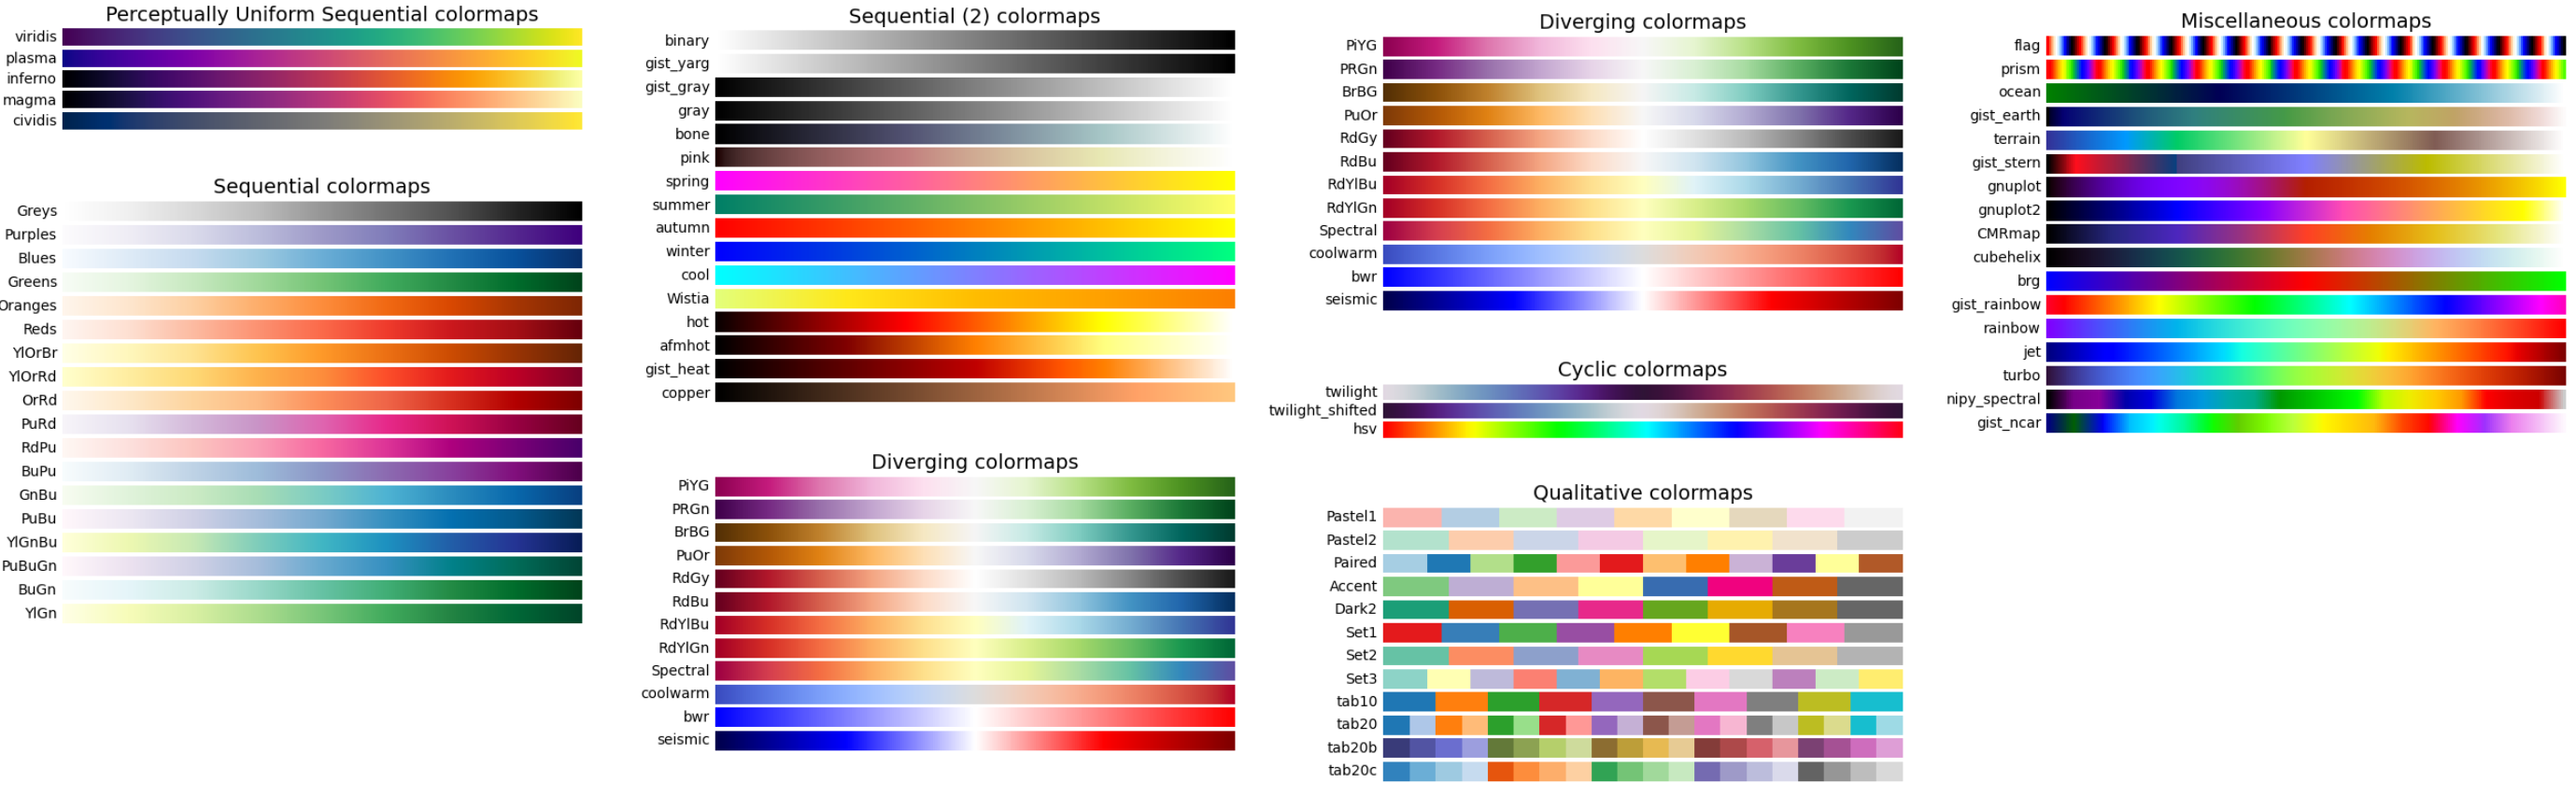

## 4.1. Elegir la imagen y el mapa de calor a utilizar

In [174]:
def graph(image, colormap):
  '''
  input: image=arreglo 2D de la imagen
         colormap= mapa de color a emplear (str)
  '''
  fig, axs = plt.subplots(1,2,figsize=(20,20)) 

  plt.subplot(1,2,1)
  plt.imshow(image, cmap='gray')
  plt.title("Imagen original")

  plt.subplot(1,2,2)
  plt.imshow(image, cmap=colormap)
  plt.title(f"Colormap:{colormap}")

  plt.show()

#Agrego el cuadro para seleccionar la imagen
dropdown = widgets.Dropdown(
    options=['rx_normal','rx_pneumonia','resonance_normal','resonance_tumor','clouds','covid'],
    value='covid',
    description='Imágenes')
display(dropdown)

#Agrego el cuadro de texto
text = widgets.Text(
       value='gray',
       description='Colormap:')
display(text)

#Agrego el boton para crear la imagen
my_button = widgets.Button(description='Ver imagen')
display(my_button)

out = widgets.Output()
display(out)

def on_button_clicked(b):
  with out:
    clear_output()
    graph(image=imagenes[dropdown.value], colormap=text.value)

my_button.on_click(on_button_clicked)

#def handle_submit(sender):
#  función para submit el valor al dar enter
#  widgets.interact(graph, image=widgets.fixed(covid), colormap=text.value)
#  print(text.value)
#text.on_submit(handle_submit)

Dropdown(description='Imágenes', index=5, options=('rx_normal', 'rx_pneumonia', 'resonance_normal', 'resonance…

Text(value='gray', description='Colormap:')

Button(description='Ver imagen', style=ButtonStyle())

Output()

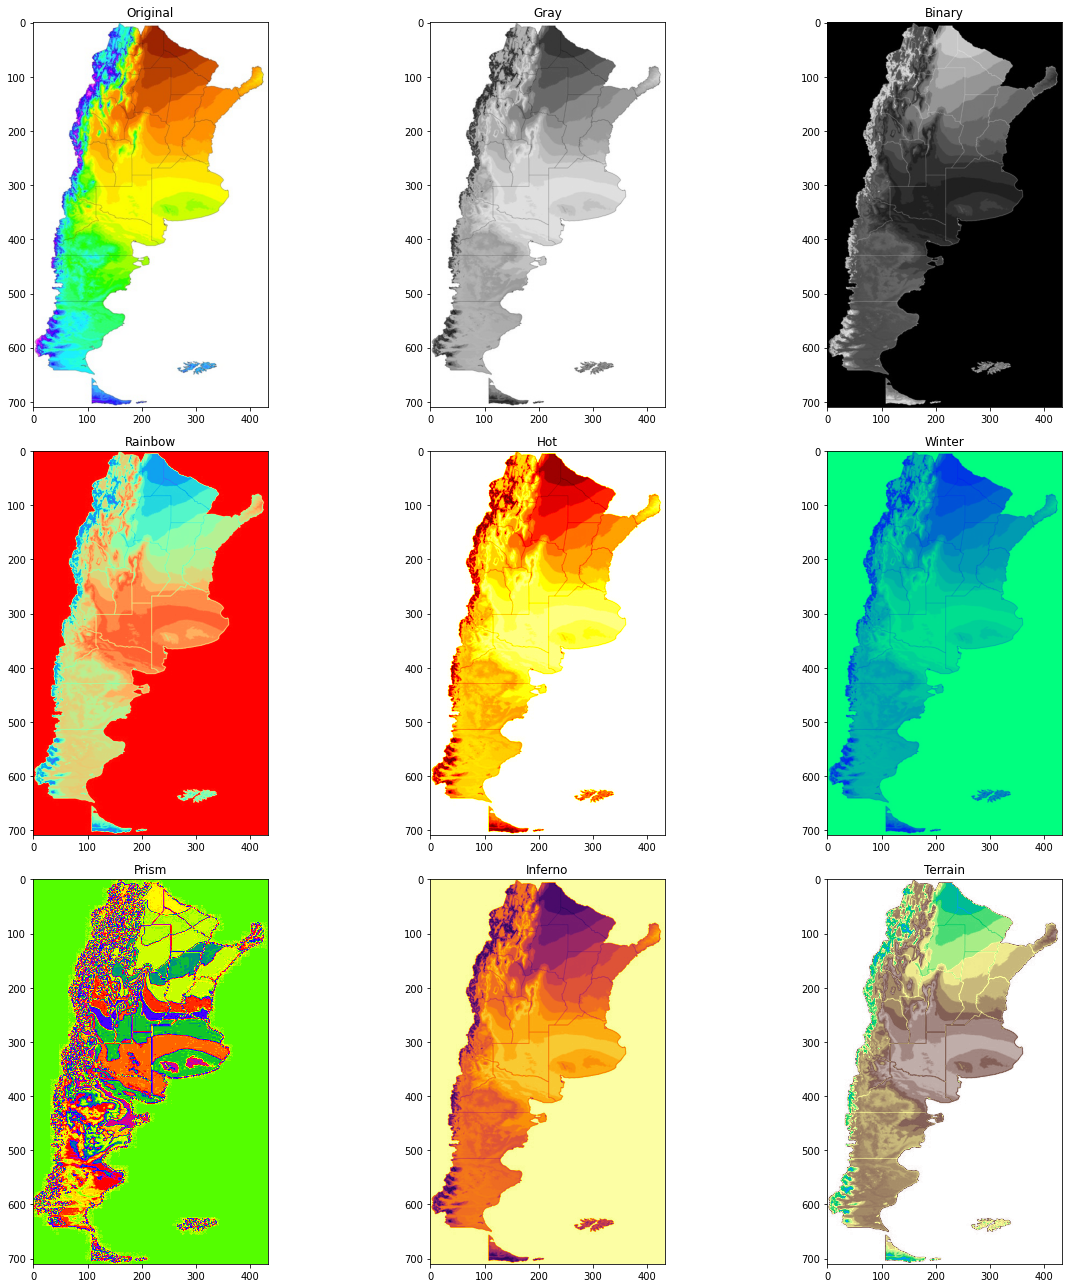

In [ ]:
fig1, axs = plt.subplots(3,3)
fig1.set_size_inches(18,18)

plt.subplot(3,3,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(3,3,2)
plt.imshow(image_2d, cmap='gray')
plt.title("Gray")

plt.subplot(3,3,3)
plt.imshow(image_2d, cmap='binary')
plt.title("Binary")

plt.subplot(3,3,4)
plt.imshow(image_2d, cmap='rainbow')
plt.title("Rainbow")

plt.subplot(3,3,5)
plt.imshow(image_2d, cmap='hot')
plt.title("Hot")

plt.subplot(3,3,6)
plt.imshow(image_2d, cmap='winter')
plt.title("Winter")

plt.subplot(3,3,7)
plt.imshow(image_2d, cmap='prism')
plt.title("Prism")

plt.subplot(3,3,8)
plt.imshow(image_2d, cmap='inferno')
plt.title("Inferno")

plt.subplot(3,3,9)
plt.imshow(image_2d, cmap='terrain')
plt.title("Terrain")

fig1.tight_layout()
plt.show()



pr